# numerically solving differential equations

let's use `DifferentialEquations.jl` (documentation [here](https://docs.juliadiffeq.org/stable/index.html)) to compute the numerical solution to differential equations.

In [1]:
using DifferentialEquations, PyPlot

# (optional) change to a cool plot style. 
# see here for options: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("Solarize_Light2")

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


## drug decay

a drug decays in your body with first order reaction kinetics. 

let $a=a(t)$ be the concentration of drug [units: mol/L] in your body at time $t$ [units: hr]. the following is a dynamic model for the decay of the drug:

$\dfrac{da}{dt}= -r a$

where $r$ [units: 1/hr] is the decay rate.

after the intial dose, the concentration of the drug is $a(t=0)=a_0$. 
simulate the decay of the drug in your body over 24 hours if no further doses are administered.

*step 1*: define the parameters in the model (`r`) and the initial condition `a₀`

In [5]:
r= 0.2 # decay rate, 1/ hr
# a\_0
a₀ = 0.05 # initial drug concentration, mol/l

0.05

*step 2*: define the right hand side of the ODE

`DifferentialEquations.jl` enforces you to write the right-hand side as:

$\dfrac{da}{dt}= f(a, p, t)$

where $p$ is a vector of parameters (which we will not use).

here, $f(a, p, t)=-ra$

In [6]:
f(a, p, t)= -r*a
f(0.2,[],0.0)

-0.04000000000000001

*step 3*: use `DifferentialEquations.jl` to solve the ODE numerically.

* `time_span` is the time span over which we wish to compute the solution
* `ODEProblem()` is how we tell `DifferentialEquations.jl` about our ODE
* `solve()` tells `DifferentialEquations.jl` to numerically solve our ODE

In [8]:
time_span= (0.0, 24.0) # solve ODE from t=0 to t=24
prob= ODEProblem(f, a₀ , time_span) #pass RHS of ODE to define it, the intial condition and the time span
a_of_t = solve(prob) #solve ODE, returns function a(t)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 13-element Array{Float64,1}:
  0.0               
  0.1385204951267627
  0.967186411127158 
  2.3746288536788995
  4.0157691781970035
  6.04573862097466  
  8.343230665477723 
 10.943395549857078 
 13.784247831462256 
 16.866062272063417 
 20.16841414936944  
 23.70934239032856  
 24.0               
u: 13-element Array{Float64,1}:
 0.05                  
 0.04863380700204163   
 0.04120607615823622   
 0.031096563063739466  
 0.022395709930665086  
 0.014922592463793818  
 0.009425133130309626  
 0.005603276660896331  
 0.003174626245547482  
 0.0017140224931608049 
 0.0008855015830573804 
 0.0004361615612349008 
 0.00041152970559181116

the output of `solve`, `a_of_t` is a function, where we can find the solution at e.g., $t=0.1$ as `a_of_t(0.1)`

In [9]:
a_of_t(0.1)

0.049009933665349815

*step 4:* plot the solution

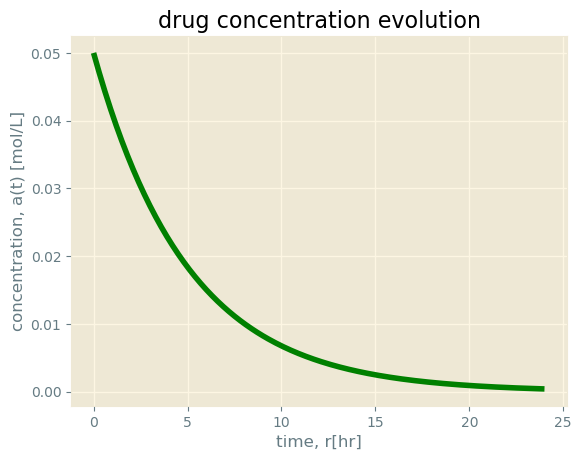

In [14]:
t= collect(0:0.1:24.0)
#or t = collect(range(0.0, 24.0, length=10))

a = a_of_t.(t)  #way 1 
a= zeros(length(t))
for i= 1:length(t)
    a[i] = a_of_t(t[i])
    end 
figure()
xlabel("time, r[hr]")
ylabel("concentration, a(t) [mol/L]")
title("drug concentration evolution")
plot(t,a, lw=4, color="green")
savefig("myfig.pdf")

**ambitious Beavers only who enjoy programming challenges:** given the solution to the ODE, say the drug is ineffective after its concentration is below 0.01 mol/L. at what time, then, does the drug become ineffective? (write a code to determine the answer to this, rather than eye-balling the plot).